# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [38]:
# Importar as libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Importar os dados
df = pd.read_csv('housing.csv')

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.

In [39]:
# 1, i) Visualizando estatísticas dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [40]:
# 1, i)
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Apenas a a variável `ocean_proximity` é categórica, o que significa que precisaremos usar dummy apenas nela. Nas demais, podemos manter os valores originais.

In [41]:
# 1, ii) Removendo nulos e deixando a variável categória em dummy -- as demais são contínuas.

# Remover nulos
df = df.dropna()

# Transformar coluna categórica em variável dummy
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [42]:
# 1, iii) Dividindo em X e y

y = df['median_house_value']
X = df.drop('median_house_value', axis=1)

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

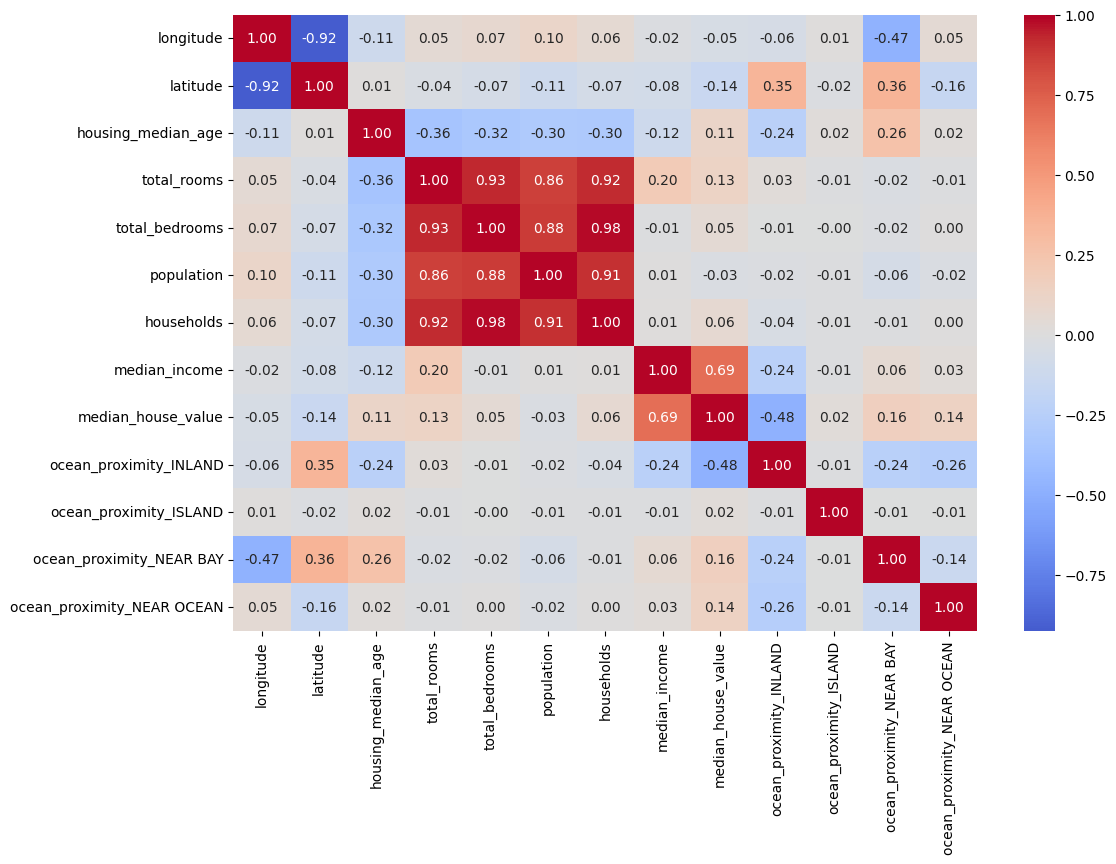

In [43]:
# 2, i) Matriz de correlação
corr = df.corr()

# Visualizar matriz de correlação
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0) #cmap ajuda a deixar as cores mais interpretáveis
plt.show()

#### Observações
*   Correlação Positiva: `median_income` (renda mediana) é extremamente correlacionada com o valor mediano da casa - indicando que locais onde a renda média e mais alta tem casas mais caras, o que faz sentido. 
*   Correlação Negativa: `ocean_proximity_INLAND` possui uma correlação negativa com o valor mediano da casa, ou seja, casas mais longe do oceano tendem a ser significantemente mais baratas, o que também faz todo o sentido.

Pela **correlação absoluta**, a variável que mais está correlacionada com os preços das casas é a variável `median_income`

### 3. Separe os dados em validação e teste

In [44]:
# 3) Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=666
)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [45]:
# 4, i) INstanciar as árvores

arvore_8 = DecisionTreeRegressor(max_depth=8, random_state=666)
arvore_2 = DecisionTreeRegressor(max_depth=2, random_state=666)

In [46]:
# 4, ii) Fitar as árvores com os dados de treino
arvore_8.fit(X_train, y_train)
arvore_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=666)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [48]:
# 5) Calcular o MSE

# 5, i) Fazer os predicts no treino e no teste pra ambas as árvores
y_pred_train_8 = arvore_8.predict(X_train)
y_pred_test_8 = arvore_8.predict(X_test)
y_pred_train_2 = arvore_2.predict(X_train)
y_pred_test_2 = arvore_2.predict(X_test)

# 5, ii) Cálculo do MSE
mse_train_8 = mean_squared_error(y_train, y_pred_train_8)
mse_test_8 = mean_squared_error(y_test, y_pred_test_8)
mse_train_2 = mean_squared_error(y_train, y_pred_train_2)
mse_test_2 = mean_squared_error(y_test, y_pred_test_2)


# 5, iii) Criando um template para exibição
template = "O MSE da árvore com profundidade={0} no {1} é: {2:,.2f}"

# 5, iv) Exibindo os resultados
print(template.format(arvore_8.get_depth(), "treinamento", mse_train_8).replace(".",","))
print(template.format(arvore_8.get_depth(), "teste", mse_test_8).replace(".",","))
print(template.format(arvore_2.get_depth(), "treinamento", mse_train_2).replace(".",","))
print(template.format(arvore_2.get_depth(), "teste", mse_test_2).replace(".",","))

O MSE da árvore com profundidade=8 no treinamento é: 3,226,338,178,39
O MSE da árvore com profundidade=8 no teste é: 3,737,877,172,54
O MSE da árvore com profundidade=2 no treinamento é: 6,774,444,352,46
O MSE da árvore com profundidade=2 no teste é: 6,635,621,973,76


Vamos fazer também para o R-quadrado

In [49]:
# 5, v) Score R-quadrado
score_train_8 = arvore_8.score(X_train, y_train)
score_test_8 = arvore_8.score(X_test, y_test)
score_train_2 = arvore_2.score(X_train, y_train)
score_test_2 = arvore_2.score(X_test, y_test)

template = "O R^2 da árvore com profundidade={0} no {1} é: {2:.2f}"

print(template.format(arvore_8.get_depth(), "treinamento", score_train_8).replace(".",","))
print(template.format(arvore_8.get_depth(), "teste", score_test_8).replace(".",","))
print(template.format(arvore_2.get_depth(), "treinamento", score_train_2).replace(".",","))
print(template.format(arvore_2.get_depth(), "teste", score_test_2).replace(".",","))

O R² da árvore com profundidade=8 no treinamento é: 0,76
O R² da árvore com profundidade=8 no teste é: 0,72
O R² da árvore com profundidade=2 no treinamento é: 0,49
O R² da árvore com profundidade=2 no teste é: 0,51


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

A árvore-8 (com profundidae 8) é a mais adequada, pois ela **minimizou o erro médio quadrádico* significantemente em comparação com a de profundida 2, e obteve um valor de R² significantemente maior. Contudo, pela profundidade da árvore, devemos tomar cuidado para que ela não esteja *oferfittada*, o que caberia uma análise subsequente.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

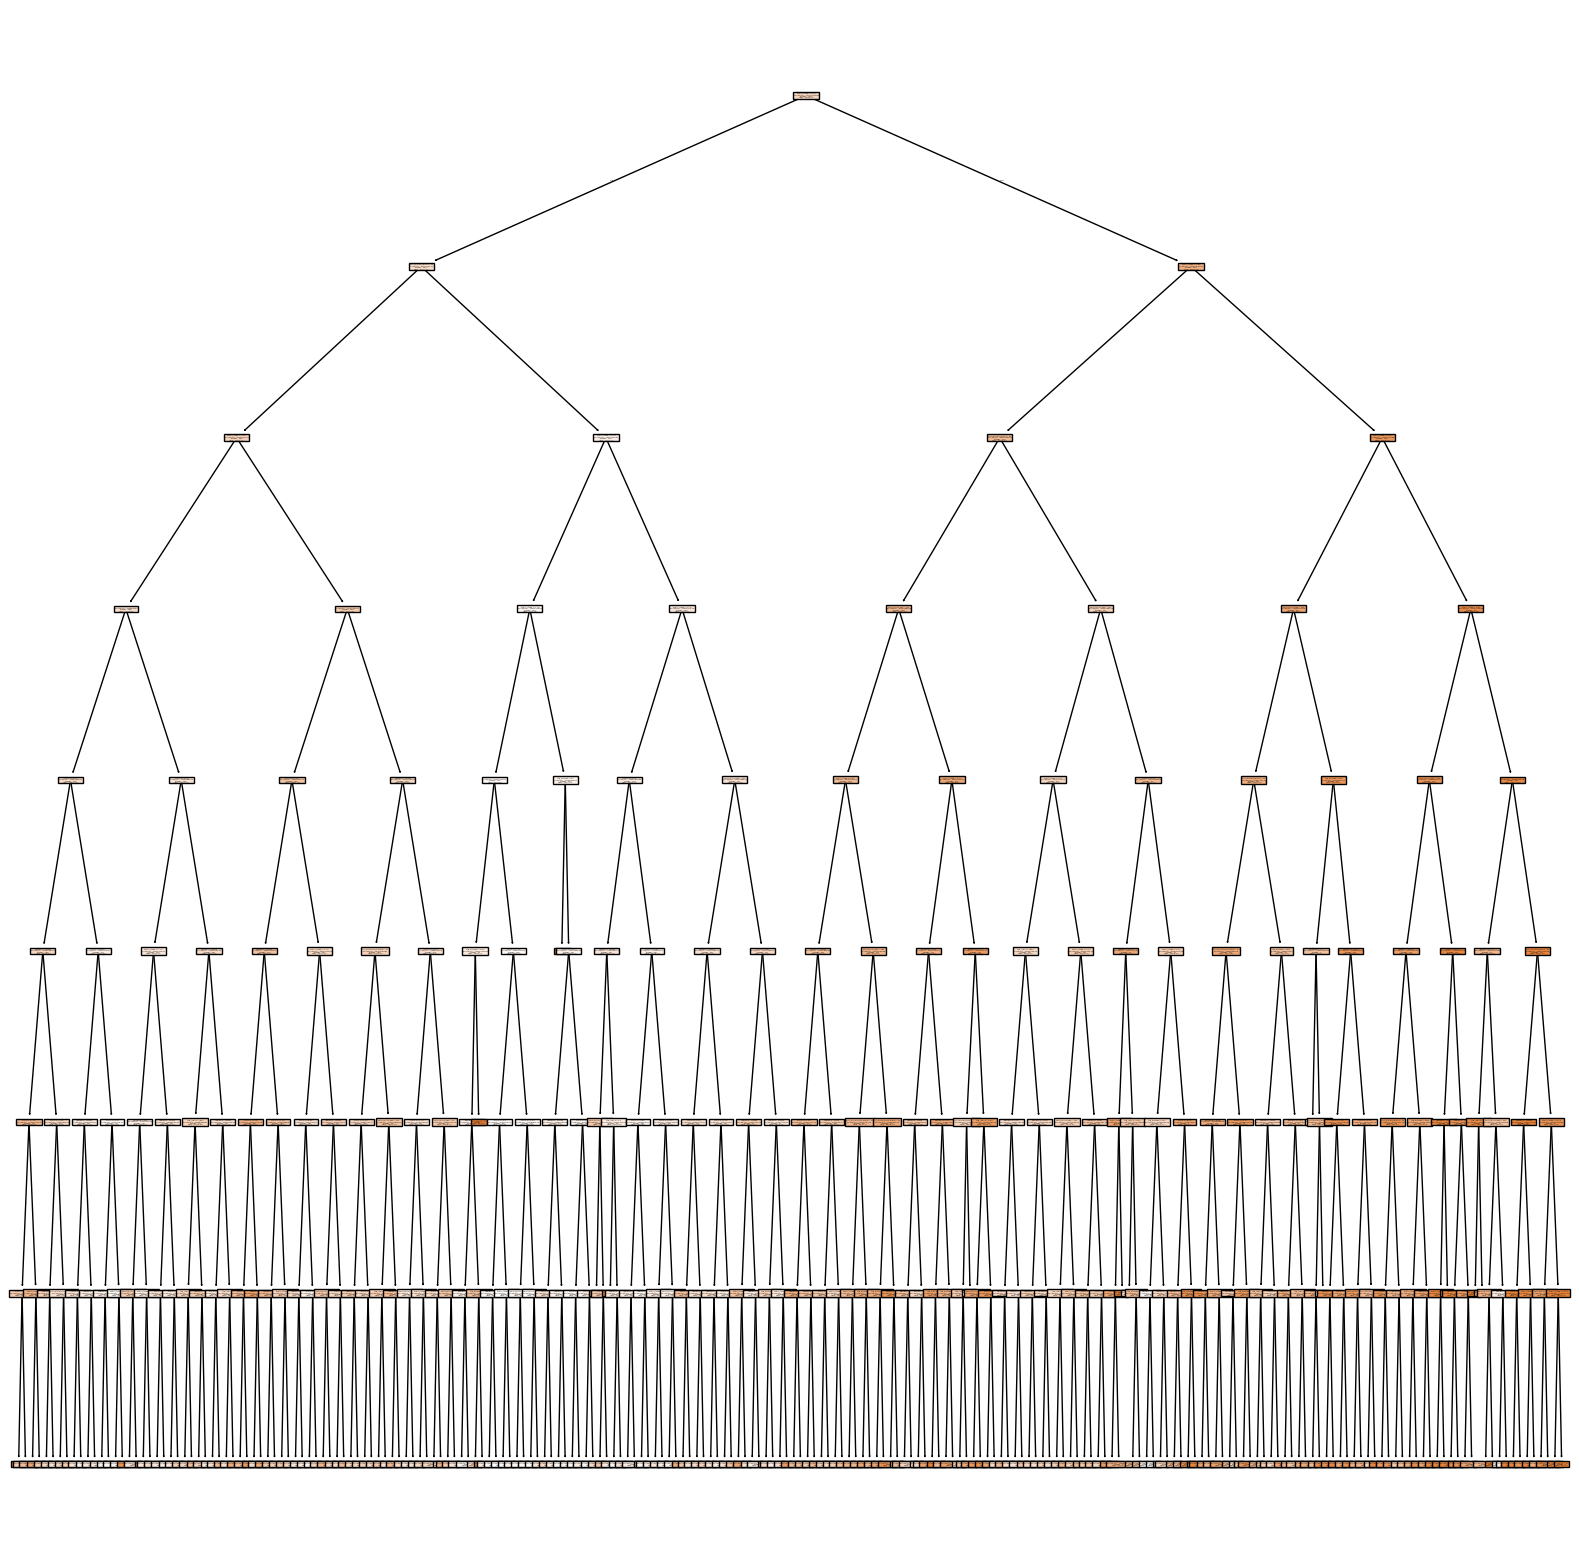

In [52]:
plt.rc('figure', figsize=(20,20))
tree.plot_tree(
    arvore_8,
    feature_names=X.columns,
    filled=True
)
plt.show()

As variáveis mais importantes vão ser as primeiras, afinal são elas que melhor dividem os dados. Vamos analisar apenas as primeiras quebras, pois elas são as mais importantes:

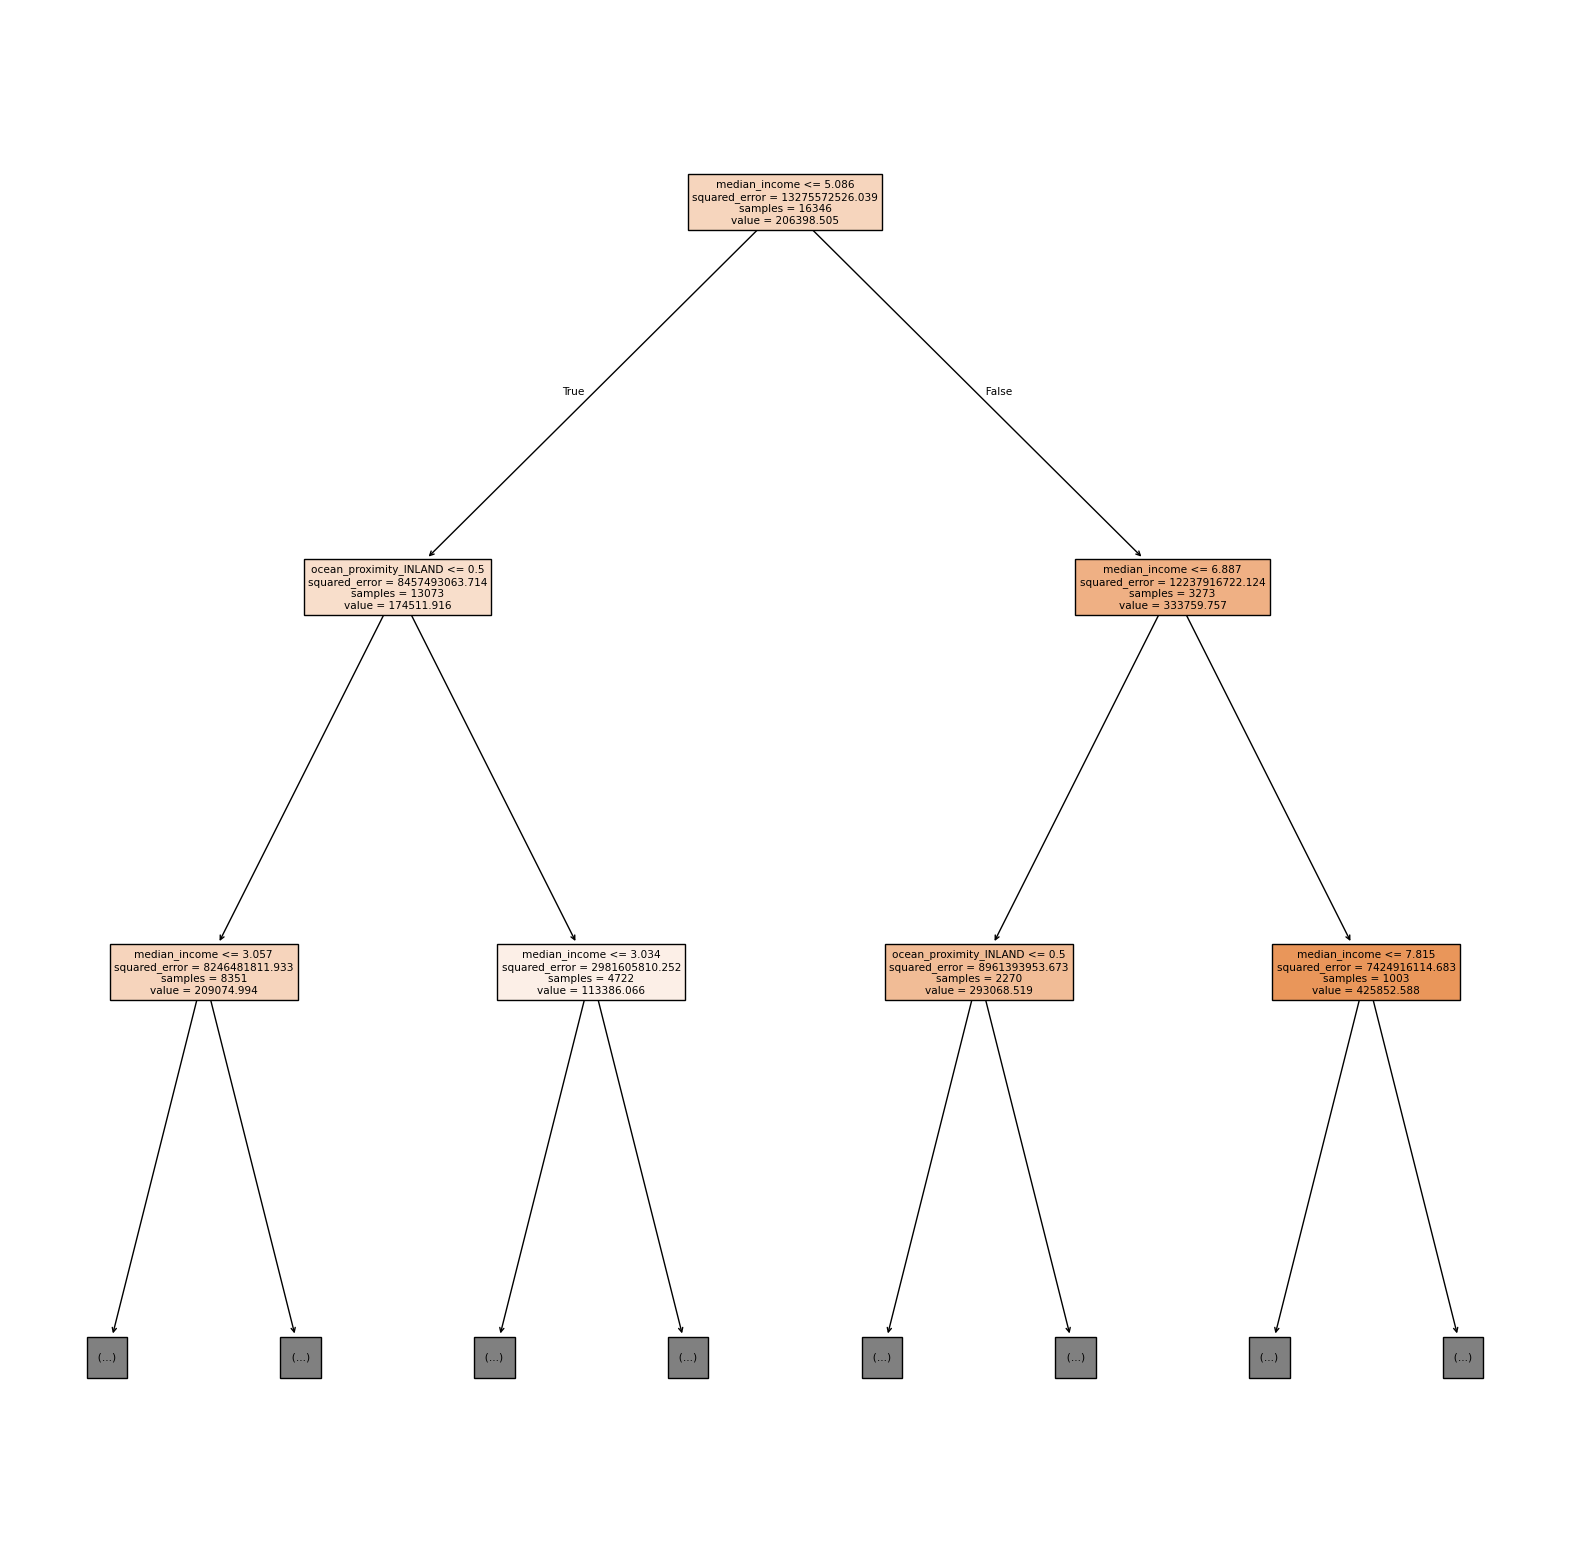

In [53]:
plt.rc('figure', figsize=(20,20))
tree.plot_tree(
    arvore_8,
    feature_names=X.columns,
    filled=True,
    max_depth=2
)
plt.show()

Como podemos ver, o modelo começou justamente *com a variável que vimos ter mais correlação com o preço da casa* no começo: a variável `median_income` (renda mediana da região).
Isso nos mostra claramente que existe uma *relação* entre a correlação entre variáveis (índice de correlação) e o algorítmo da árvore de regressão do scikit-learn (dos erros quadráticos médios). Essa relação tem a ver com a linearidade dos dados.